# Practica No 11: Practica COVID 19 - Interrupción


## Nombre:

###       Fernando Sanchez

## Enunciado:

### Simulacion de eventos discretos del COVID-19

### Datos:
    Datos de la provincia de Imbambura: Total: 3 hospitales, 11 camas, 11 respiradores, 11 equipos de 
    radiología, personal 150, 1.13% de camas por cada 1000 pesonas.
    
    Hospital 1: Camas 7, respiradores 7, 7 equipos de radiologia, 0 ventiladores
    Hospital 2: Camas 4, respiradores 4, 4 ventiladores
    Hospital 3: (IESS no se tiene infomacion)
    
### Datos estadisticos:
    Tasa de crecimiento: 7 (Modelo de probabilidad)
    Infectados actuales: 99
### Modelo Propuesto
    Generar un modelo del uso de los recursos de los hospitales para la atencion de las personas que tiene el 
    COVID-19 en base a los datos presentados, por cada uno de los dias.
    
## Practica

    En base a la practica del COVID vacunación, realizar el proceso de interrupción en base a que el 5% de los 
    pacientes que estan en la sala de espera presentan complicaciones de salud y deben ser trasladados 
    inmediamente al centro de salud más cercano y ser atendidos. Realizar este proceso y generar una segunda 
    linea de simulación para el traslado, atencion y alta del paciente que presenta complicaciones, en base a 
    los siguientes datos:
    
       * Traslado de la ambulancia: 5 - 15 minutos.
       * Atención centro de salud: 5 - 24 horas
       * Alta: 1 - 2 horas
       * El 10% de las personas que presentan complicaciones fallecen.

    Generar graficas que indiquen las personas que presentaron complicaciones en base a los tiempos, estado de 
    las personas y respuesta.

In [2]:
# Importar las librerias para el analasis
import simpy
import random
import matplotlib.pyplot as pp
import numpy as np


In [3]:
#PARAMETROS
HOSPITALES = 3
HOSPITAL_CAMA_A = 7
HOSPITAL_CAMA_B = 4
HOSPITAL_VENT_A = 7
HOSPITAL_VENT_B = 4
INFECTADOS = 20
TASA_CRECIMIENTO = 7
PERSONAL_MEDICO = 150
DIAS_INTERNADO = 10
DIAS_SIMULACION = 20

#Diccionario para almacenar los resultados
persona_recuperadas={}
persona_fallecidas={}


In [4]:
class Hospital(object):
    #constructor
    def __init__(self, env, num_cama, name):
            self.env = env
            self.num_cama = num_cama
            self.camas = simpy.Resource(env, num_cama)
            self.name = name
            
    def ingresar_paciente(self, paciente):
        yield self.env.timeout(random.randint(DIAS_INTERNADO-5, DIAS_INTERNADO+5))
        print("El paciente se termino de atender: ", paciente, " tiempo de salida: ", self.env.now, " hospital ", self.name)

def llegada_paciente(env, hospital, paciente):
    arrive = env.now
    estado = random.randint(1,100)
    if (estado < 60):
        with hospital.camas.request() as cama:
            dias_esperando = random.randint(1,5)
            requerimiento = yield cama | env.timeout(dias_esperando)
            wait = env.now - arrive
            if cama in requerimiento:
                print("Al paciente: ", paciente, " se le asigna una CAMA ", " hospital " , hospital.name)
                yield env.process(hospital.ingresar_paciente(paciente))
                estado = random.randint(1,120)
                if (estado < 8) :
                    persona_fallecidas[env.now] = persona_fallecidas[env.now] + 1 if env.now in persona_fallecidas else  1
                else:
                    persona_recuperadas[env.now] = persona_recuperadas[env.now] + 1 if env.now in persona_recuperadas else 1
            else:
                print("El paciente " , paciente, " en el hospital ", hospital.name, " espero ", wait , " dias y fallece no hay camas")
                persona_fallecidas[env.now] = persona_fallecidas[env.now] + 1 if env.now in persona_fallecidas else  1        
    else :
        print("El paciente no tiene COVID : ", paciente, " hospital ", hospital.name )

In [14]:
def ejecutar(env, tasa_crecimiento, infectados):
    hospitalA = Hospital(env, HOSPITAL_CAMA_A, "A")
    hospitalB = Hospital(env, HOSPITAL_CAMA_B, "B")
    for i in range(infectados):
        asignar_hospital(env, hospitalA, hospitalB, i)
    paciente = infectados
    while True:
        yield env.timeout(1)
        for i in range(tasa_crecimiento):
            paciente += 1
            asignar_hospital(env, hospitalA, hospitalB, paciente)
                
def asignar_hospital(env, hospitalA, hospitalB, paciente):
    hosp_esc = random.randint(1,2)
    if (hosp_esc == 1):
        print("Llega paciente nuevo : ", paciente, " hospital A tiempo ", env.now)
        env.process(llegada_paciente(env, hospitalA, paciente))
    else:
        print("Llega paciente nuevo : ", paciente, " hospital B tiempo ", env.now)
        env.process(llegada_paciente(env, hospitalB, paciente))

In [15]:
print("Practica COVID 19 - Interrupción")
env=simpy.Environment()
env.process(ejecutar(env,TASA_CRECIMIENTO, INFECTADOS))
env.run(until=DIAS_SIMULACION)


Practica COVID 19 - Interrupción
Llega paciente nuevo :  0  hospital B tiempo  0
Llega paciente nuevo :  1  hospital A tiempo  0
Llega paciente nuevo :  2  hospital A tiempo  0
Llega paciente nuevo :  3  hospital A tiempo  0
Llega paciente nuevo :  4  hospital A tiempo  0
Llega paciente nuevo :  5  hospital B tiempo  0
Llega paciente nuevo :  6  hospital B tiempo  0
Llega paciente nuevo :  7  hospital A tiempo  0
Llega paciente nuevo :  8  hospital B tiempo  0
Llega paciente nuevo :  9  hospital A tiempo  0
Llega paciente nuevo :  10  hospital A tiempo  0
Llega paciente nuevo :  11  hospital B tiempo  0
Llega paciente nuevo :  12  hospital A tiempo  0
Llega paciente nuevo :  13  hospital B tiempo  0
Llega paciente nuevo :  14  hospital A tiempo  0
Llega paciente nuevo :  15  hospital B tiempo  0
Llega paciente nuevo :  16  hospital A tiempo  0
Llega paciente nuevo :  17  hospital A tiempo  0
Llega paciente nuevo :  18  hospital A tiempo  0
Llega paciente nuevo :  19  hospital B tiempo 

In [8]:
print(" Resultados ")
print("Resultados pacientes :")
print("Recuperados: ")
print(persona_recuperadas)
print("Fallecidos: ")
print(persona_fallecidas)

 Resultados 
Resultados pacientes :
Recuperados: 
{5: 2, 7: 3, 9: 2, 10: 1, 11: 2, 13: 3, 15: 2, 16: 2, 18: 3, 19: 3, 12: 3, 17: 1}
Fallecidos: 
{2: 3, 3: 3, 4: 4, 5: 8, 6: 5, 7: 3, 8: 10, 9: 4, 10: 9, 11: 7, 12: 7, 13: 4, 14: 5, 15: 6, 16: 12, 17: 11, 18: 3, 19: 8, 1: 1}


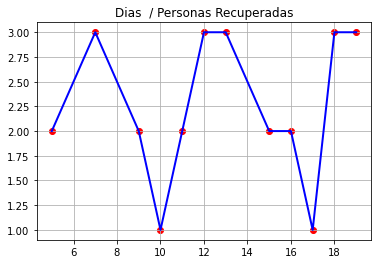

In [11]:
datos=sorted(persona_recuperadas.items()) # Ordenamos los datos
x, y =zip(*datos) # Obtener x(tiempo - clave) y el y(Numero de vehiculos atendidos - valor)
pp.plot(x,y,linewidth=2,color='blue') #Dibujamos las lineas
pp.scatter(x,y,color='r') # Dibujamos los puntos (x,y)
pp.title("Dias  / Personas Recuperadas")
pp.grid(True) #Generamos una cuadricula
pp.show() #Mostramos el grafico

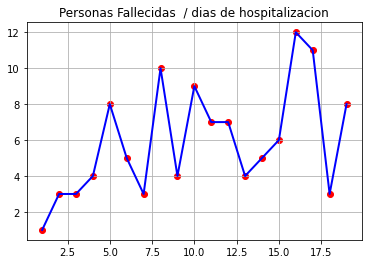

In [13]:
if (persona_fallecidas):
    datos=sorted(persona_fallecidas.items()) # Ordenamos los datos
    x, y =zip(*datos) # Obtener x(tiempo - clave) y el y(Numero de vehiculos atendidos - valor)
    pp.plot(x,y,linewidth=2,color='b') #Dibujamos las lineas
    pp.scatter(x,y,color='r') # Dibujamos los puntos (x,y)
    pp.title("Personas Fallecidas  / dias de hospitalizacion")
    pp.grid(True) #Generamos una cuadricula
    pp.show() #Mostramos el grafico